In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier

In [2]:
crypto_df = pd.read_csv(Path('Resources/crypto_data.csv'))

In [3]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
# Filter for currencies that are currently being traded
crypto_df.drop(crypto_df[crypto_df['IsTrading'] == False].index, inplace=True)

In [52]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,41.99995,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1055184902.04000,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.00000,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,980222595.00000,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7296537.50000,21000000


In [53]:
# Drop CoinName and IsTrading columns
crypto_df2 = crypto_df.drop(['IsTrading', 'Unnamed: 0','CoinName'], axis=1)

In [54]:
# Drop all rows that have at least one null value
crypto_df2.dropna()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,41.99995,42
2,Scrypt,PoW/PoS,1055184902.04000,532000000
4,SHA-256,PoW/PoS,0.00000,0
5,X13,PoW/PoS,29279424622.50270,314159265359
7,SHA-256,PoW,17927175.00000,21000000
...,...,...,...,...
1238,SHA-256,DPoS,1999999995.30560,2000000000
1242,Scrypt,PoW/PoS,14931046.15466,250000000
1245,CryptoNight,PoW,980222595.00000,1400222610
1246,Equihash,PoW,7296537.50000,21000000


In [55]:
# Filter for cryptocurrencies that have been mined
crypto_df3 = crypto_df2[crypto_df2['TotalCoinsMined'] > 0] 
crypto_df3


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,41.99995,42
2,Scrypt,PoW/PoS,1055184902.04000,532000000
5,X13,PoW/PoS,29279424622.50270,314159265359
7,SHA-256,PoW,17927175.00000,21000000
8,Ethash,PoW,107684222.68650,0
...,...,...,...,...
1238,SHA-256,DPoS,1999999995.30560,2000000000
1242,Scrypt,PoW/PoS,14931046.15466,250000000
1245,CryptoNight,PoW,980222595.00000,1400222610
1246,Equihash,PoW,7296537.50000,21000000


In [56]:
#Convert features columns to numerical
crypto_dummies = pd.get_dummies(crypto_df3, columns = ['Algorithm', 'ProofType'])

In [57]:
crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,41.99995,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1055184902.04000,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,29279424622.50270,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,17927175.00000,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,107684222.68650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1999999995.30560,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,14931046.15466,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,980222595.00000,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7296537.50000,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Standardize the data

crypto_scaled = StandardScaler().fit_transform(crypto_dummies)
print(crypto_scaled[0:5])


[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [59]:
# Initialize PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

# Get principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [60]:
# Transform PCA data to a DataFrame to determine how the number of features changed
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.33510,1.03219,-0.59071,0.00140,-0.00000,-0.00000,0.00000,-0.00713,-1.31976,-0.05181,...,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000
1,-0.31843,1.03233,-0.59113,0.00139,-0.00000,-0.00000,0.00000,-0.00774,-1.32251,-0.05667,...,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000
2,2.30547,1.65638,-0.68362,0.00473,-0.00000,-0.00000,0.00000,-0.05478,-1.54288,-0.94395,...,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000
3,-0.14518,-1.32059,0.19281,-0.00123,0.00000,0.00000,-0.00000,-0.00207,0.28146,0.25186,...,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000
4,-0.15177,-2.03619,0.39618,-0.00170,0.00000,0.00000,-0.00000,0.02774,0.51910,0.18882,...,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000


In [61]:
# Number of columns reduced from 98 to 74

In [62]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [87]:
# Initialize t-SNE model
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=250)

In [88]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [89]:
tsne_features.shape

(532, 2)

In [90]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

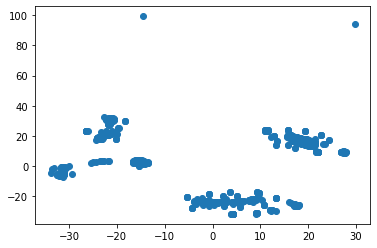

In [96]:
# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

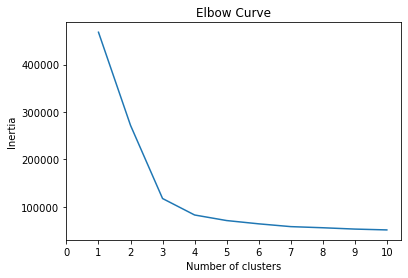

In [92]:
# Finding the best value for k
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()